<h1><b>Factors Contributing to having an income above 50K or below 50K</b></h1>

<h2>What factors does a persons income depend on?</h2>

<h3>The data used here was extracted from the 1994 Census bureau. It aims to show what people earn over 50k a year, and contains other different data that may or may not contribute to the final income of an individual. Goals:</h3>

<ul>
    <li>Load the database</li>
    <li>Clean the data frame & check for duplicates</li>
    <li>Determine through analysis and visualisation whether any of the data in the table contribute to a persons income</li>
    <li>Conclusion based on findings</li>
</ul>

## <h2><b>Step 1: Load in the necessary libraries and the database</b></h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\evgen\OneDrive\Рабочий стол\adult.csv')

In [4]:
df.head(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


## <h2><b>Step 2: Cleaning the Data Frame</b></h2>

<h3>Checking for duplicate data</h3>

In [5]:
df.duplicated().value_counts()

#Checking out how many duplicate rows the dataframe has

False    32537
True        24
Name: count, dtype: int64

In [6]:
df.drop(index=df[df.duplicated()].index)

#dropping the duplicate rows based on their index

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<h3>Checking for NaN values</h3>

In [7]:
df.isna().sum()

#trying to locate NaN values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no NaN values in the database, but there are '?' symbols instead of NaN's, therefore I will search for those values

In [8]:
df.apply(lambda x:x =='?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Since the dataframe uses '?' for NaN, I will be removing '?'

In [9]:
df.drop(index = df[df[df.apply(lambda x:x =='?')].any(axis=1)].index, inplace = True)

#Dropping the '?' symbol rows

In [10]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


## <h2><b>Step 3: Analysis & Visualisation</b></h2>

<h3>First lets see how the income distribution is divided</h3>

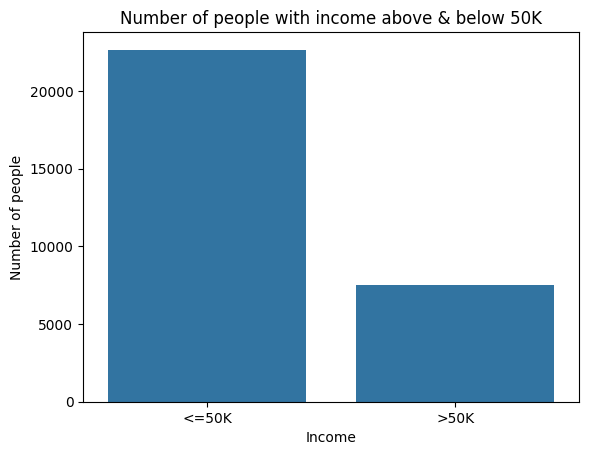

In [11]:
sns.countplot(x = 'income', data = df)
plt.title('Number of people with income above & below 50K')
plt.ylabel('Number of people')
plt.xlabel('Income')
plt.show()

Comments:
<ul>
    <li>We see that about 3 times more people earn less than 50K a year rather than more than 50k a year</li>
</ul>

<h3>Lets see the age distribution of the dataframe through a pie chart and a box plot</h3>

C:\Users\evgen\AppData\Local\Temp\ipykernel_12108\920689327.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age1 = df.loc[df['age']<20].count()[0]
C:\Users\evgen\AppData\Local\Temp\ipykernel_12108\920689327.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age2 = df.loc[(df['age']>=20) & (df['age']<40)].count()[0]
C:\Users\evgen\AppData\Local\Temp\ipykernel_12108\920689327.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ag

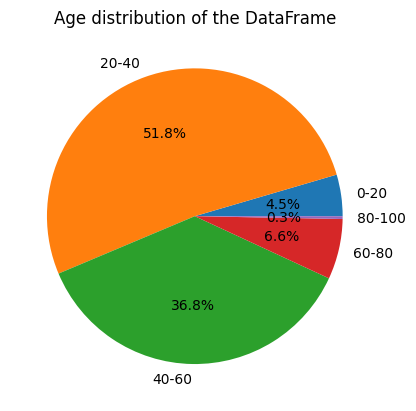

In [12]:
age1 = df.loc[df['age']<20].count()[0]
age2 = df.loc[(df['age']>=20) & (df['age']<40)].count()[0]
age3 = df.loc[(df['age']>=40) & (df['age']<60)].count()[0]
age4 = df.loc[(df['age']>=60) & (df['age']<80)].count()[0]
age5 = df.loc[(df['age']>=80) & (df['age']<100)].count()[0]

ages = [age1, age2, age3, age4, age5]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

plt.pie(ages, labels = labels, autopct='%1.1f%%')
plt.title('Age distribution of the DataFrame')
plt.show()

Comments:
<ul>
<li>We can see the the majority of the data is based on people ages 20 to 40 (about 50%), and the minority here are 80 to 100 years olf (0.3%)</li>
</ul>

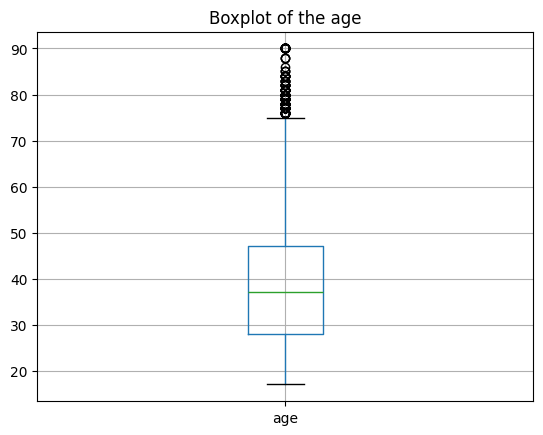

In [13]:
df.boxplot(column='age')
plt.title('Boxplot of the age')
plt.show()

Comments:
<ul>
<li>The mean age of the dataframe is about 37 years old, majority of the data lies between 28 and 47 years old</li>
</ul>

<h3>Age distribution of the dataframe based on their income (above OR below 50K)

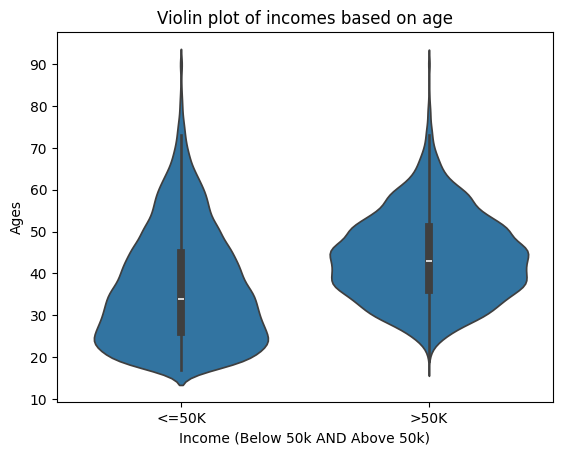

In [14]:
y = df['age'].values
x = df['income'].values


sns.violinplot(x = x, y = y)
plt.xlabel ('Income (Below 50k AND Above 50k)')
plt.ylabel ('Ages')
plt.title('Violin plot of incomes based on age')
plt.show()

Comments:
<ul>
    <li>Majority of the people who earn below 50k are about 24 years of age</li>
    <li>Majority of the people who earn above 50k are about 45 years of age </li>
    <li>The older a person gets, the less iikely he is to earn below 50k</li>
    <li>The older a person gets after 45, the less likely is the person to be earning above 50K</li>
    <li>one must be at least 20 years of age to start earning more than 50K (even though its very rare to do so)</li>
</ul>

<h3>Histograms to show the age distribution of people earning below or above 50K</h3>

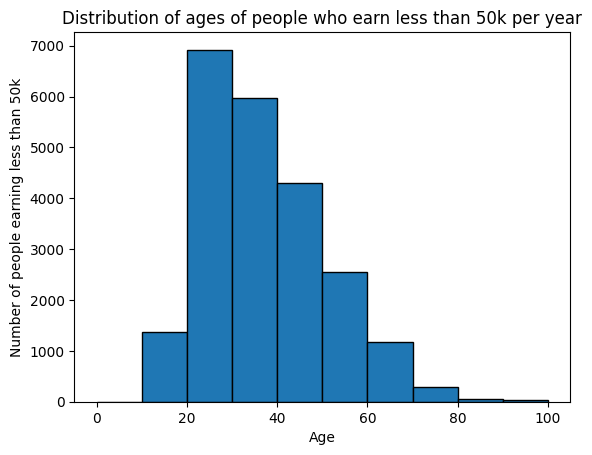

In [15]:
filt = df['income'] == '<=50K'
less = df[filt]

age = less['age'].values
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(age, bins = bins, edgecolor = 'black')
plt.title('Distribution of ages of people who earn less than 50k per year')
plt.xlabel('Age')
plt.ylabel('Number of people earning less than 50k')
plt.show()

Comments:
<ul>
<li>Most common age to be earning below 50K is between 20 and 30</li>
</ul>

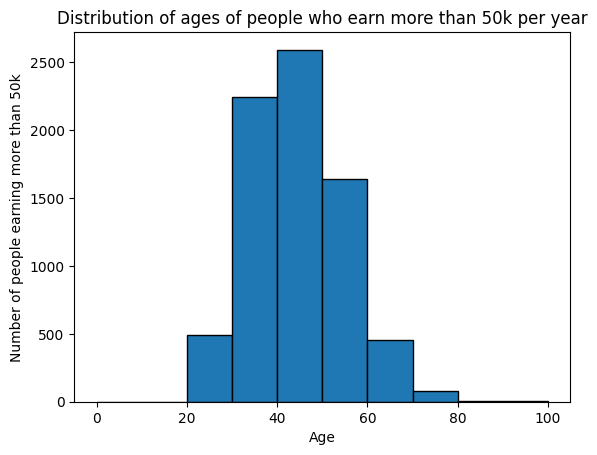

In [16]:
filt = df['income'] == '>50K'
more = df[filt]

age = more['age'].values
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(age, bins = bins, edgecolor = 'black')
plt.title('Distribution of ages of people who earn more than 50k per year')
plt.xlabel('Age')
plt.ylabel('Number of people earning more than 50k')
plt.show()

Comments:
<ul>
<li>The most common age to be earning above 50K is from 40 to 50</li>
</ul>

<h3>Barplot of the jobs and how many people working for these jobs earn above or below 50K</h3>

In [17]:
#Grouping the tables into groups (INCOME AND OCCUPATION) where people earn above 50k and below 50k
occupation_more_50k = df[df['income'] == '>50K'].groupby('occupation').income.count()
occupation_less_50k = df[df['income'] == '<=50K'].groupby('occupation').income.count()

occ_more_50 = pd.DataFrame (occupation_more_50k).reset_index()
occ_less_50 = pd.DataFrame (occupation_less_50k).reset_index()

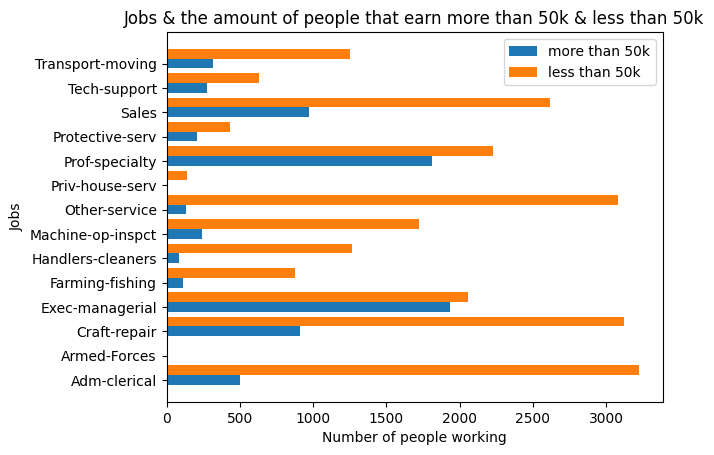

In [18]:
#turning the values into arrays to use for plotting
x = occ_more_50['occupation'].values
y = occ_more_50['income'].values
xx = occ_less_50['occupation'].values
yy = occ_less_50['income'].values

values = np.arange(len(y))
width = 0.4

plt.barh(values, y, width, label='more than 50k')
plt.barh(values+width, yy, width, label='less than 50k') 

plt.yticks(ticks = values, labels = x)
plt.title('Jobs & the amount of people that earn more than 50k & less than 50k')
plt.ylabel('Jobs')
plt.xlabel('Number of people working')
plt.legend()
plt.show()

Comments:
<ul>
    <li>Exec-managerial job has the highest proportion of employees earning more than 50k</li>
    <li>Other-services & Priv-house-serv have the lowest proportion of employees earning more than 50k</li>
</ul>

<h3>Barplot showing the correlation between race and income</h3>

In [19]:
a = df.groupby('income').race.value_counts()
aa = pd.DataFrame(a)
aa.reset_index(inplace=True)

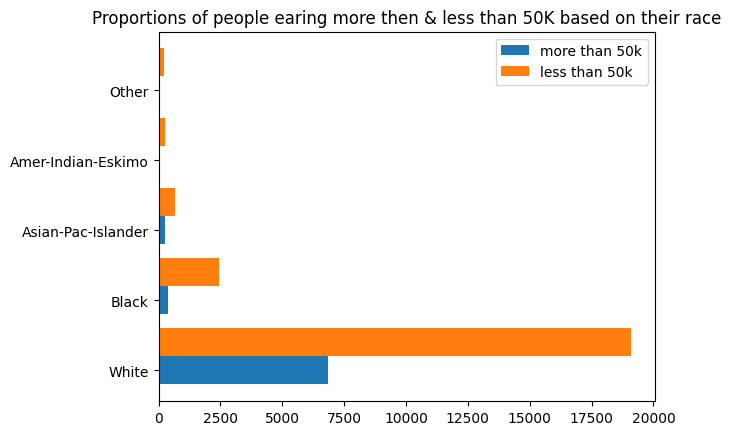

In [20]:
income_less = aa[aa['income'] == '<=50K']
income_more = aa[aa['income'] == '>50K']

x_more = income_more['race'].values
y_more = income_more['count'].values
y_less = income_less['count'].values

val = np.arange(len(x_more)) 

width = 0.4
plt.barh(val, y_more, width, label='more than 50k')
plt.barh(val+width, y_less, width, label = 'less than 50k')
plt.title('Proportions of people earing more then & less than 50K based on their race')

plt.legend()
plt.yticks(ticks = val, labels = x_more)
plt.show()

Comments:
<ul>
    <li>White & Asian-Pac-Islander have a higher proportion of people earning above 50K</li>
    <li>Black, Amer-Indian-Eskimo, Others have the least proportion of people earning more than 50K)</li>
    <li>Most of the sampling for data was done on white population</li>
</ul>


<h3>Violin plot of peoples income and how many hours they work weekly</h3>

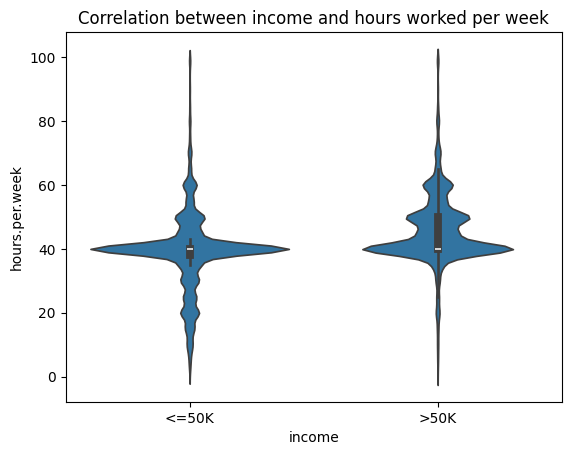

In [21]:
sns.violinplot(x = 'income', y = 'hours.per.week', data = df)
plt.title('Correlation between income and hours worked per week')
plt.show()

Comments:
<ul>
    <li>The main working hours per week are 40h, 50h, 60h</li>
    <li>People earning above 50K are more likely to work for longer hours like 50 or 60 hours</li>
    <li>People earning less than 50K are more liekly to work for 40 hours a week</li>
    <li>People earning less than 50k are more liekly to work below 40 hours a week</li>
</ul>

<h3>Barplot of peoples income based on their marital status</h3> 

In [69]:
a = df.groupby('income')['marital.status'].value_counts()
marital_status = pd.DataFrame(a)
marital_status.reset_index(inplace=True)

#grouping together peoples income and marital status, and finding the count for each marital status

In [42]:
marital_status

,income,marital.status,count
0,<=50K,Never-married,9256
1,<=50K,Married-civ-spouse,7666
2,<=50K,Divorced,3762
3,<=50K,Separated,873
4,<=50K,Widowed,747
5,<=50K,Married-spouse-absent,339
6,<=50K,Married-AF-spouse,11
7,>50K,Married-civ-spouse,6399
8,>50K,Never-married,470
9,>50K,Divorced,452


In [70]:
piv_mar_stat = marital_status.pivot_table(index='marital.status', columns= 'income', values = 'count')

#I want to restructure this dataframe, so it would be more ordered and easier to work with

In [55]:
piv_mar_stat.reset_index(inplace=True)
piv_mar_stat

income,index,marital.status,<=50K,>50K
0,0,Divorced,3762.0,452.0
1,1,Married-AF-spouse,11.0,10.0
2,2,Married-civ-spouse,7666.0,6399.0
3,3,Married-spouse-absent,339.0,31.0
4,4,Never-married,9256.0,470.0
5,5,Separated,873.0,66.0
6,6,Widowed,747.0,80.0


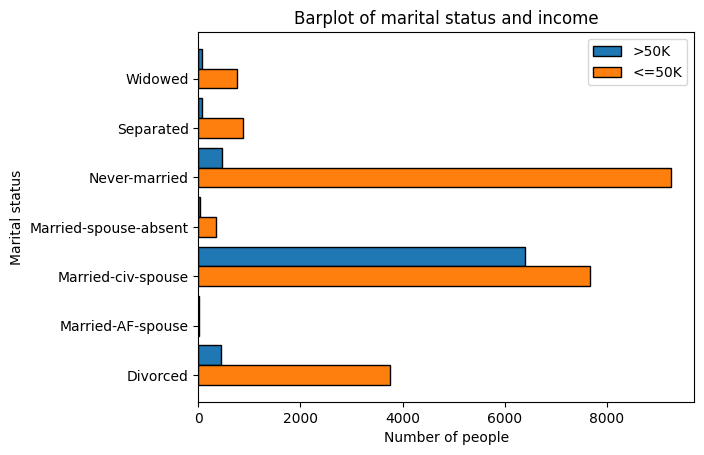

In [67]:
y_less = piv_mar_stat['<=50K'].values

y_more = piv_mar_stat['>50K'].values

y_more
width = 0.4
vallength = np.arange(len(x))

plt.barh(vallength + width, y_more, width, label = '>50K', edgecolor = 'black')
plt.barh(vallength, y_less, width, label = '<=50K', edgecolor = 'black')
plt.title('Barplot of marital status and income')
plt.ylabel('Marital status')
plt.xlabel('Number of people')
plt.legend()

plt.yticks(ticks = vallength, labels = (piv_mar_stat['marital.status'].values))
plt.show()

Comments:
<ul>
    <li>Those who are married-civ-spouse are moe liekly to be earning above 50K</li>
    <li>The rest of the data seems to be relatively the same, with a much lower chance of earning above 50K</li>
    <li>There was too little sampling done on the 'married-AF-spouse' demographic, therefore the results seem to be unreliable</li>
</ul>

<h3>Barplot of incomes based on gender</h3>

In [25]:
a = pd.DataFrame(df.groupby('sex').income.value_counts())
a.reset_index(inplace=True)
a
a['income.gender'] = a['sex'] + a['income']


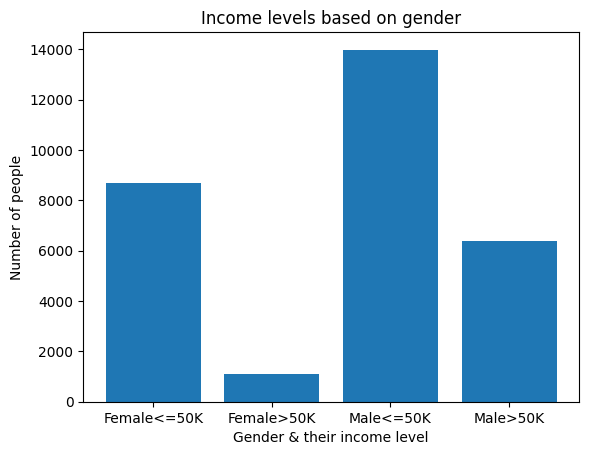

In [26]:
x = a['income.gender'].values
y = a['count'].values

plt.bar(x, y)
plt.xlabel('Gender & their income level')
plt.ylabel('Number of people')
plt.title('Income levels based on gender')
plt.show()


Comments:
<ul>
    <li>Men are more likely to be earning more than 50K</li>
    <li>Women are much more likely to be earning below 50K</li>
</ul>


## <h2><b>Step 4: Conclusions based on analysis</b></h2>

<h3>Through the extensive analysis of the Data Frame, the following factors affect the income level were identified:</h3>
<ul>
    <li>More people earn below 50K a year rather than above 50K</li>
    <li>Mens income is more often seen to be above 50K rather than womans income</li>
    <li>Those who are married-civ-spouse have a higher change of earning above 50K, all the other marital statuses have more or less the same (low) change of earning above 50K/li>
    <li>Those who earn more than 50K are more likely to be morekin for 50 and 60 hours per week or more. Those who work for less than 50K are more likely to be working 40 hours per week or less</li>
    <li>White & Asian-Pac-Islander have a higher chance of earning above 50K per year</li>
    <li>Job positions like Exec-managerial & Prof-spec have a higher chance of earning above 50k a year. The least paying jobs are adm-clerical, handlers-cleaners, and other-service</li>
    <li>The ripe age of earning above 50K seems to be starting from 30 to 40, and reaches its peak in 40 to 50, with a decline afterwards. Mostly younger people (20 to 30) earn below 50K, with a steady decline as the age increases</li>
    
    
</ul>